# YOLO V11 Medium Model in Instance Segmentation

This model is a YOLOv11-Medium instance segmentation model that was pre-trained using Roboflow and will be fine-tuned here using the Roboflow API key.

In [1]:
!nvidia-smi

Sun Nov  2 13:01:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install Ultralytics Roboflow

In [2]:
!pip install ultralytics --upgrade roboflow
!wget -O yolo11m-seg.pt https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m-seg.pt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 134.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
--2025-11-02 13:01:25--  https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m-seg.pt
Resolving github.com (github.com)... 140.82.116.4
Connecting

# Roboflow API KEY

In [3]:
import os
from getpass import getpass

os.environ['ROBOFLOW_API_KEY'] = getpass('My Roboflow API key (input hidden): ')
print("Roboflow API key set in env var ROBOFLOW_API_KEY")


My Roboflow API key (input hidden): ··········
Roboflow API key set in env var ROBOFLOW_API_KEY


# Get dataset

In [4]:
from roboflow import Roboflow

!pip install roboflow

rf = Roboflow(api_key=os.environ["ROBOFLOW_API_KEY"])

project = rf.workspace("space-ujzmi").project("queen-cells-segment-ri9y6-f88wd-p286k")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to queen-cells-segment-2 in yolov11:: 100%|██████████| 9141/9141 [00:02<00:00, 4380.71it/s]


# Train Model

In [5]:
!yolo task=segment mode=train model=yolo11m-seg.pt data=/content/queen-cells-segment-2/data.yaml epochs=50 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/queen-cells-segment-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=

# Overall Performance (All Classes)

| Metric        | Value | Interpretation                                                                                                                   |
| ------------- | ----- | -------------------------------------------------------------------------------------------------------------------------------- |
| Precision (P) | 0.956 | Out of all cells the model predicted, 95.6% were correct. High precision means very few false positives.                         |
| Recall (R)    | 0.950 | Out of all actual cells in the images, the model detected 95.0%. High recall means it rarely misses objects.                     |
| mAP50         | 0.985 | Intersection-over-Union (IoU) at 50% threshold. 98.5% overlap with ground truth, excellent segmentation accuracy.                |
| mAP50-95      | 0.879 | Average over multiple IoU thresholds. Slightly lower than mAP50 but still strong, showing good overall segmentation performance. |


# Per class performance

| Class             | Precision | Recall | mAP50 | mAP50-95 | Interpretation                                                                                                                                                               |
| ----------------- | --------- | ------ | ----- | -------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Capped Cell       | 0.944     | 0.938  | 0.975 | 0.824    | The model correctly detects ~94% of predictions and recalls ~94% of actual capped cells. Slightly lower mAP50-95 indicates minor segmentation errors at stricter thresholds. |
| Failed Cell       | 0.979     | 1.0    | 0.995 | 0.934    | Almost perfect detection and recall for failed cells (small sample: 11 instances). Excellent performance, though dataset is small.                                           |
| Matured Cell      | 0.972     | 0.966  | 0.989 | 0.896    | Very high precision and recall. Model occasionally misses a few matured cells but segments them accurately.                                                                  |
| Open Cell         | 0.955     | 0.953  | 0.988 | 0.878    | Very accurate and robust detection for open cells; slightly lower mAP50-95 shows minor segmentation imperfections.                                                           |
| Semi-Matured Cell | 0.932     | 0.89   | 0.976 | 0.863    | High precision with slightly lower recall (misses some semi-matured cells), still excellent overall segmentation performance.                                                |


# Speed & Efficiency


Preprocess: 0.3 ms/image

Inference: 14.7 ms/image → Model can process ~68 images per second

Postprocess: 9.1 ms/image


In [6]:
!ls runs/segment

train


In [7]:
!ls runs/segment/train/weights


best.pt  last.pt


In [8]:
from google.colab import files
files.download('runs/segment/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!find /content/runs -maxdepth 3 -type d -name "train*"


/content/runs/segment/train


In [10]:
!ls /content/runs/segment/train


args.yaml			 MaskP_curve.png       train_batch1.jpg
BoxF1_curve.png			 MaskPR_curve.png      train_batch2.jpg
BoxP_curve.png			 MaskR_curve.png       val_batch0_labels.jpg
BoxPR_curve.png			 results.csv	       val_batch0_pred.jpg
BoxR_curve.png			 results.png	       val_batch1_labels.jpg
confusion_matrix_normalized.png  train_batch0.jpg      val_batch1_pred.jpg
confusion_matrix.png		 train_batch10680.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch10681.jpg  val_batch2_pred.jpg
MaskF1_curve.png		 train_batch10682.jpg  weights


In [11]:
import pandas as pd

df = pd.read_csv("/content/runs/segment/train/results.csv")
df.tail()


,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,11659.2,0.45285,0.67832,0.31012,0.85405,0.95263,0.95618,0.98360,0.88494,...,0.95618,0.98360,0.87312,0.50978,0.73912,0.31849,0.87693,0.000121,0.000121,0.000121
46,47,11923.2,0.44819,0.67042,0.30561,0.85448,0.94249,0.96067,0.98233,0.88827,...,0.95880,0.98139,0.87748,0.50134,0.73789,0.33260,0.87652,0.000099,0.000099,0.000099
47,48,12186.8,0.44092,0.66143,0.29831,0.85053,0.94570,0.96886,0.98302,0.88756,...,0.96886,0.98302,0.87578,0.50386,0.75263,0.33398,0.87649,0.000077,0.000077,0.000077
48,49,12445.1,0.43778,0.65942,0.29438,0.84717,0.93873,0.96244,0.98456,0.88932,...,0.96244,0.98456,0.87759,0.50188,0.74018,0.31686,0.87414,0.000055,0.000055,0.000055
49,50,12705.0,0.43018,0.65115,0.28667,0.84539,0.95458,0.95051,0.98479,0.89764,...,0.95051,0.98479,0.88069,0.49428,0.73933,0.31940,0.87338,0.000033,0.000033,0.000033


# Interpretation of the results:

The YOLO11-Medium segmentation model demonstrates strong performance in detecting queen cells. Overall, the model achieves a precision of 0.955 and a recall of 0.950, showing that it reliably detects relevant queen cells while minimizing false positives.

The model achieved a mAP@50 of 0.985, reflecting excellent identification of all queen cell classes. Even with stricter IoU thresholds (mAP50-95 = 0.881), the model maintains high-quality segmentation and localization.

Failed queen cells are detected almost perfectly (Precision = 0.979, Recall = 1.0), which is crucial for early identification of non-viable cells and proactive hive management.

| Class             | Precision | Recall |  F1-Score | mAP50 | mAP50-95 |
| ----------------- | --------: | -----: | --------: | ----: | -------: |
| **All Classes**   |     0.955 |  0.950 | **0.952** | 0.985 |    0.881 |
| Capped Cell       |     0.944 |  0.938 | **0.941** | 0.975 |    0.824 |
| Failed Cell       |     0.979 |  1.000 | **0.989** | 0.995 |    0.934 |
| Matured Cell      |     0.972 |  0.966 | **0.969** | 0.989 |    0.896 |
| Open Cell         |     0.955 |  0.953 | **0.954** | 0.988 |    0.878 |
| Semi-Matured Cell |     0.932 |  0.890 | **0.910** | 0.976 |    0.863 |




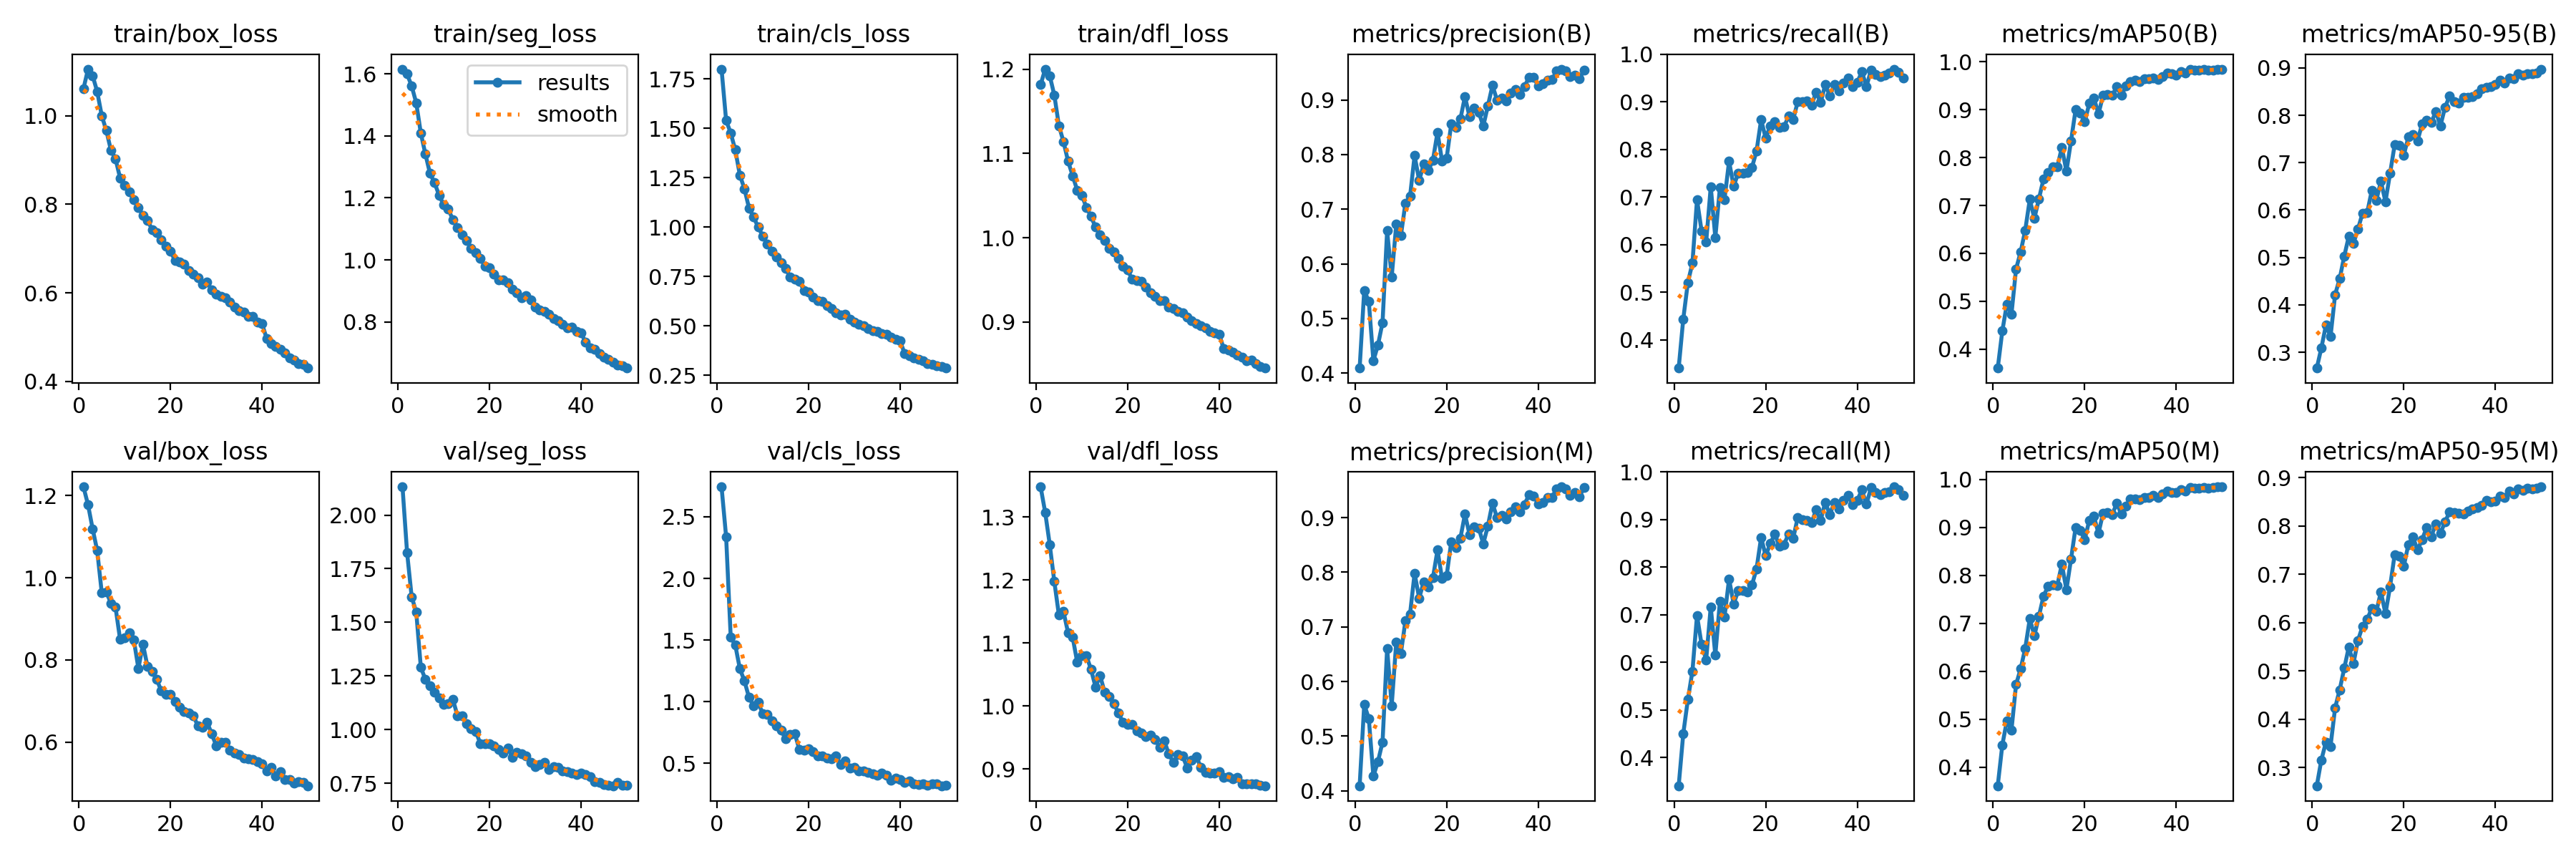

In [12]:
from IPython.display import Image, display
display(Image(filename="/content/runs/segment/train/results.png", width=900))


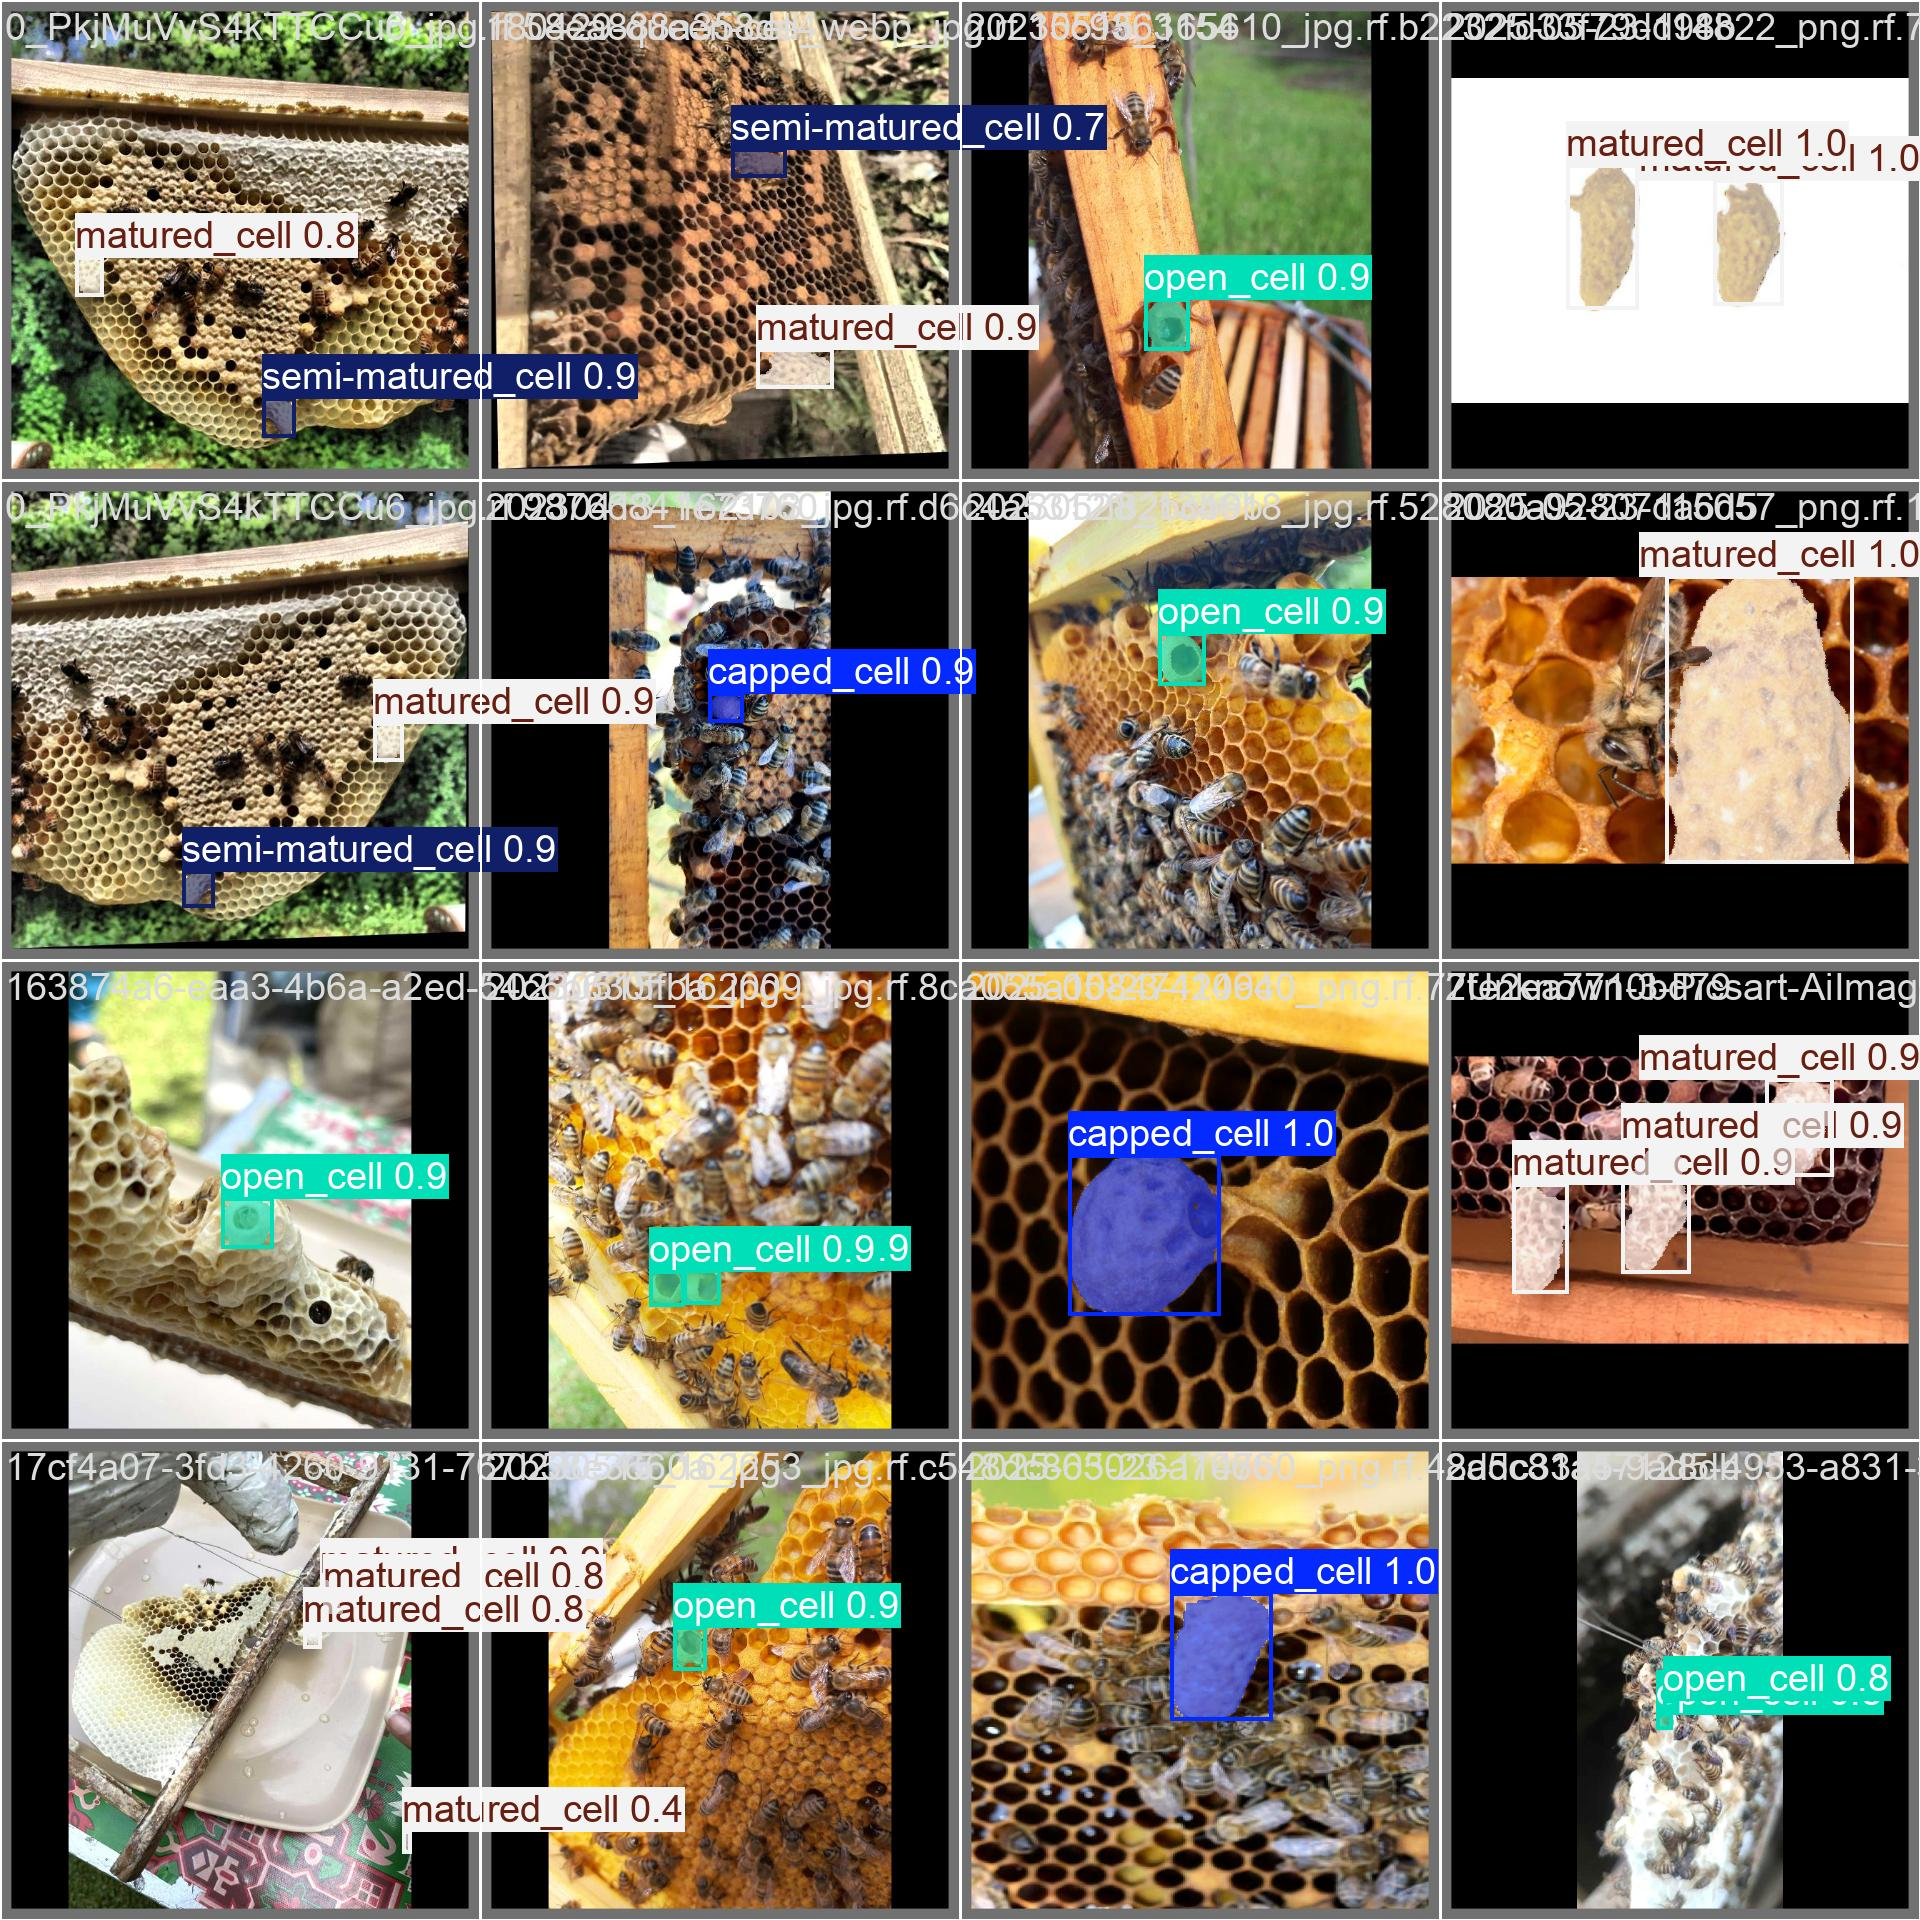

In [14]:
display(Image(filename="/content/runs/segment/train/val_batch0_pred.jpg", width=1700))


# Data Visualization

# Confusion Matrix

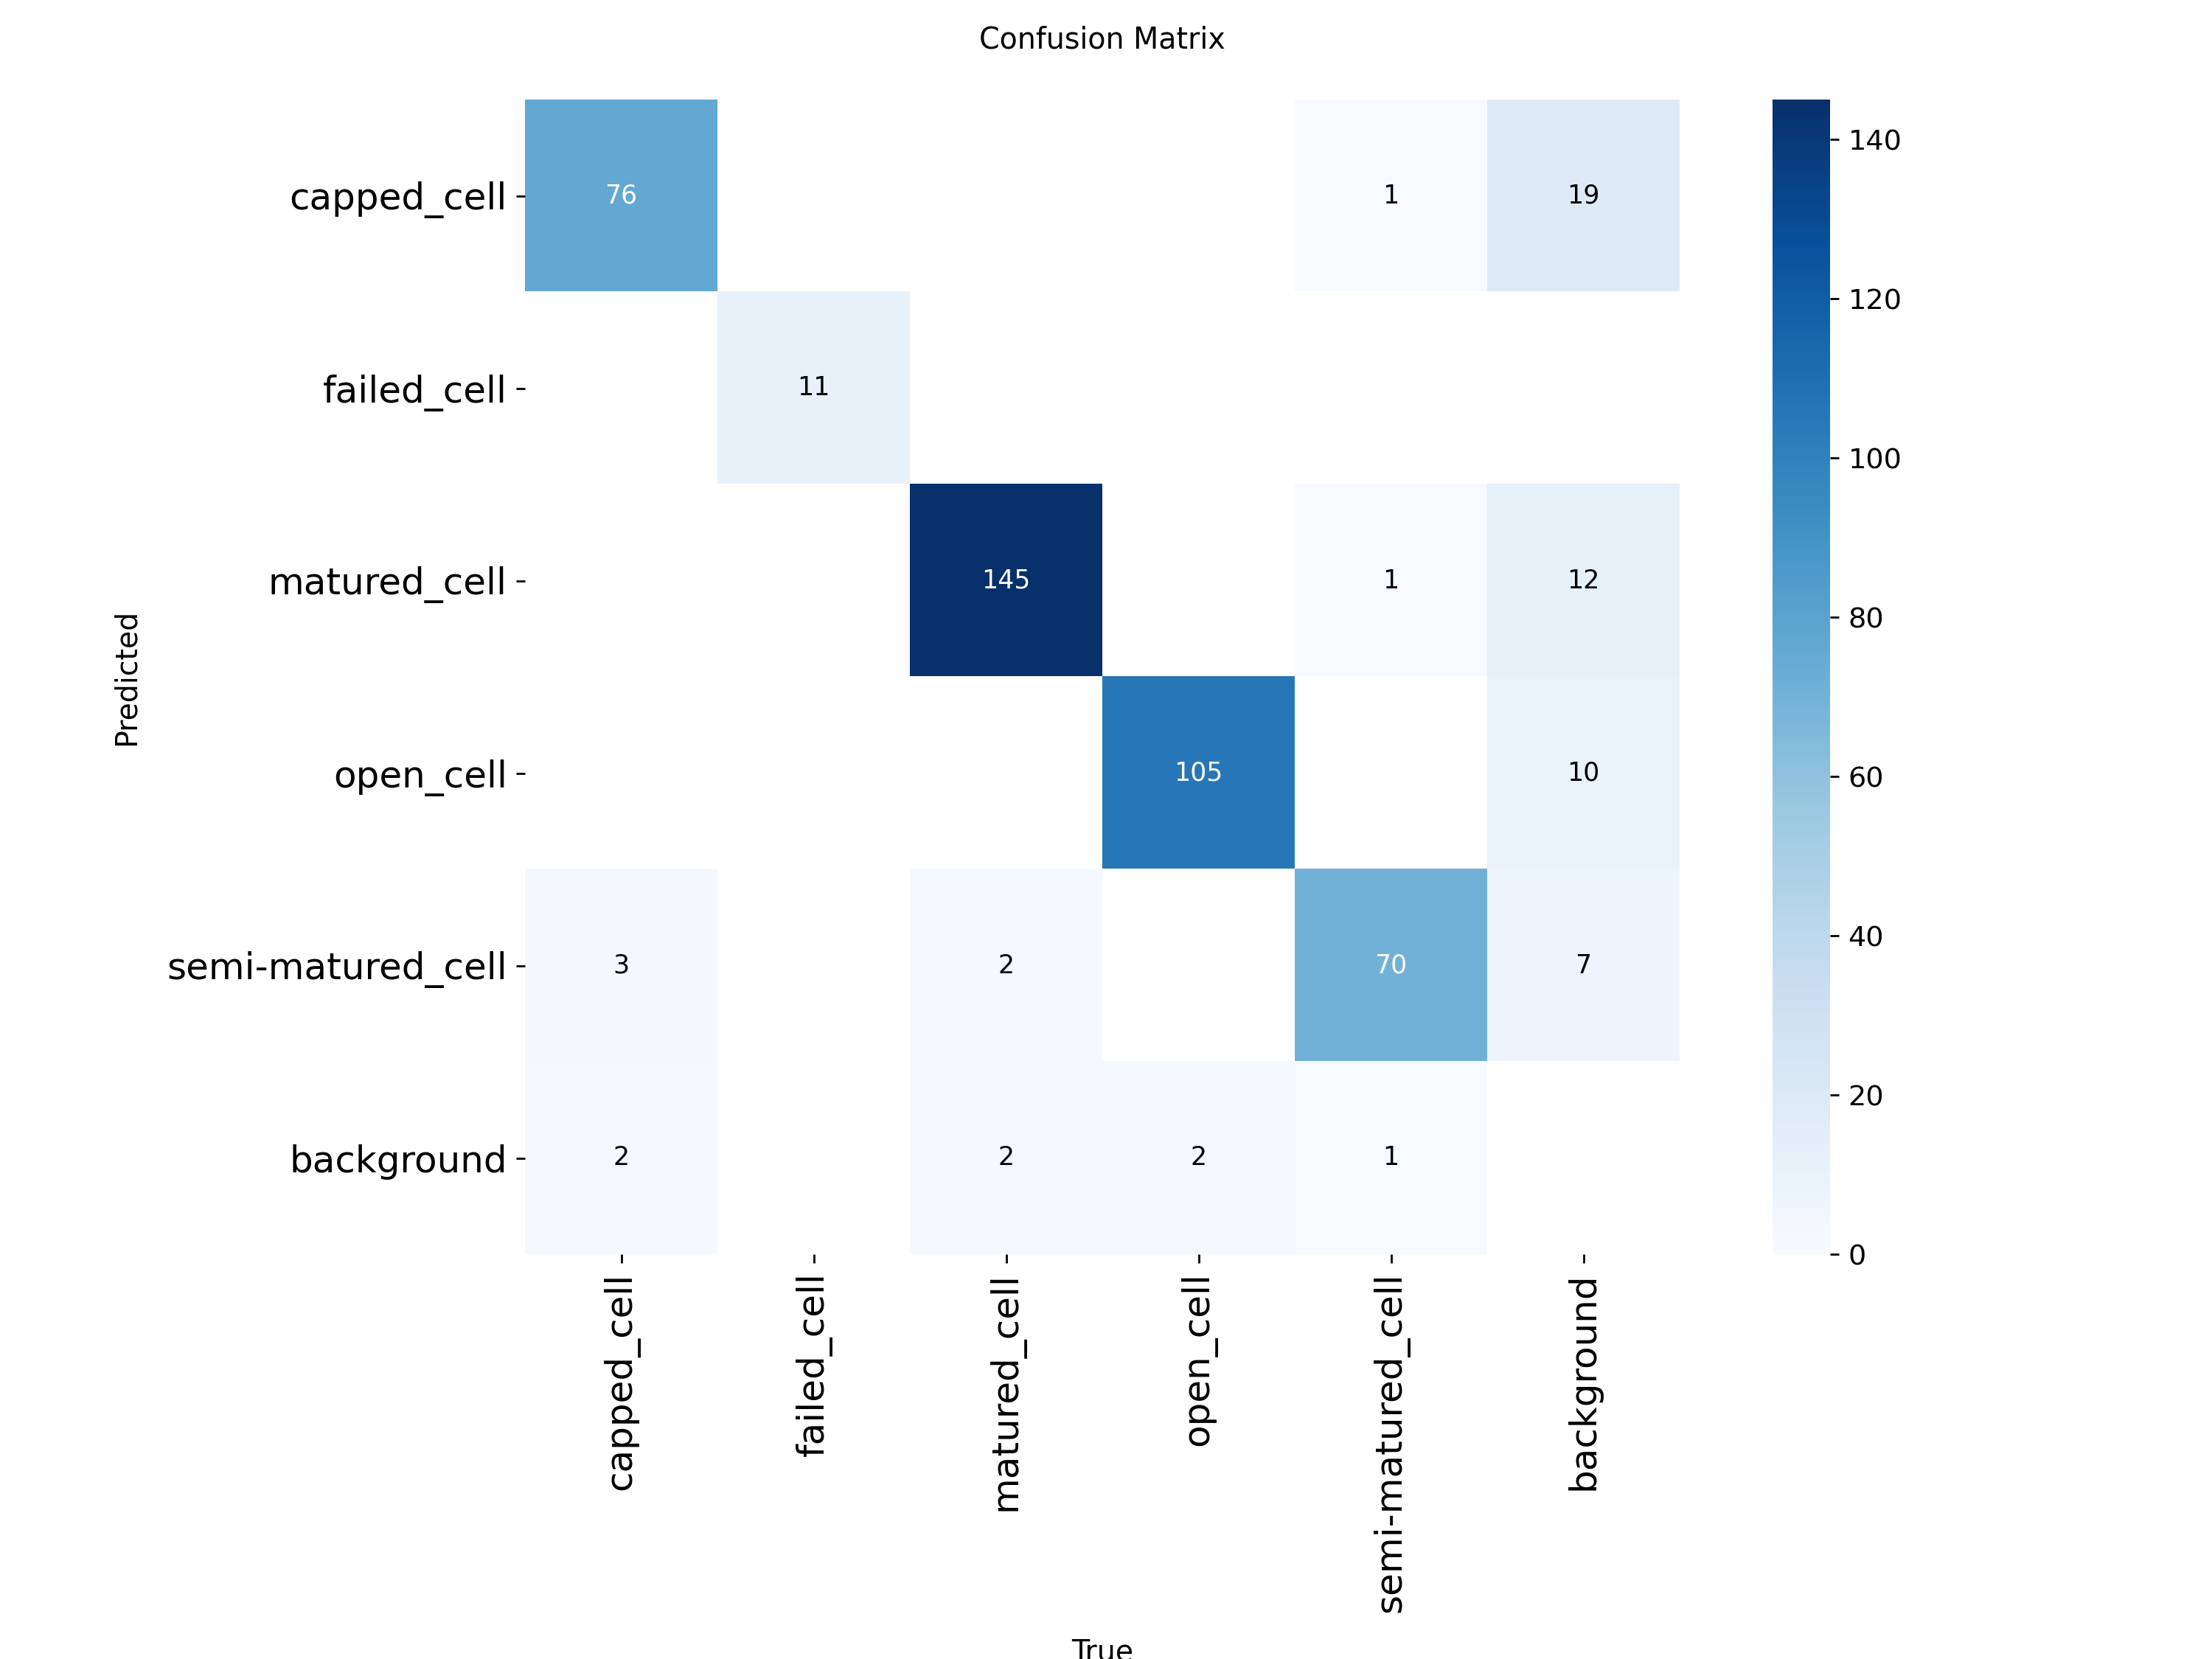

In [15]:
display(Image(filename="/content/runs/segment/train/confusion_matrix.png", width=900))


The confusion matrix shows that the model effectively distinguishes between most brood cell types,
with strong classification performance and only a few misclassifications.

Key Observations
* The strong diagonal values indicate that the model correctly identifies the majority of samples for each class.
* Matured cells (145) and open cells (105) have the highest correct predictions, suggesting that the model is highly confident when detecting these stages.
* Capped cells (76) are also well-classified, though a few were confused with background and semi-matured cells, likely due to visual similarity in texture or partial capping.
* Semi-matured cells (70) achieved good detection accuracy, with a few misclassifications overlapping with open and matured cells — expected since these developmental stages can appear visually transitional.
* Failed cells (11) were identified with moderate accuracy; some were mistaken for nearby classes, possibly because of subtle or incomplete development patterns.
* Only a few instances were incorrectly classified as background, showing that the model handles non-relevant regions well.

Overall Insight
* The confusion matrix confirms that the YOLO11-Large segmentation model performs reliably across brood cell maturity stages.
* Most errors occur between visually adjacent categories (e.g., open vs. semi-matured cells), reflecting biological overlap rather than model weakness.


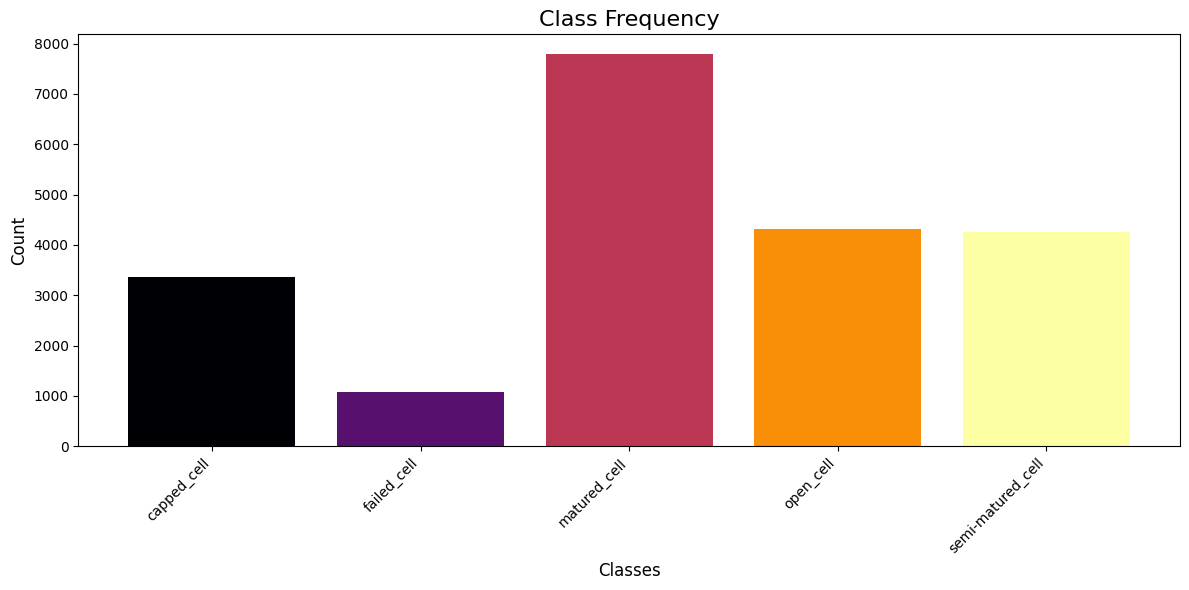

In [16]:
import os
from collections import Counter
import yaml
import matplotlib.pyplot as plt
import numpy as np

labels_dir = "/content/queen-cells-segment-2/train/labels"

counts = Counter()
for file in os.listdir(labels_dir):
    with open(f"{labels_dir}/{file}", "r") as f:
        for line in f.readlines():
            cls = int(line.split()[0])
            counts[cls] += 1

with open("/content/queen-cells-segment-2/data.yaml", "r") as y:
    names = yaml.safe_load(y)["names"]

num_classes = len(names)
colors = plt.cm.inferno(np.linspace(0, 1, num_classes))

plt.figure(figsize=(12, 6))
plt.bar(names, [counts[c] for c in range(num_classes)], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Class Frequency", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


# YOLOv11 Segmentation Training and Validation Loss Curve

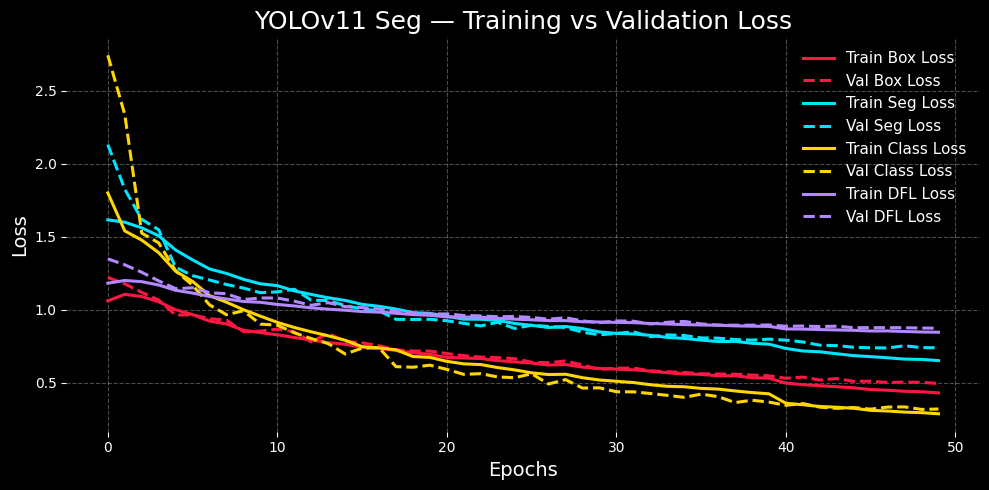

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/runs/segment/train/results.csv")

plt.style.use("dark_background")

plt.figure(figsize=(10,5), facecolor="black")
ax = plt.gca()
ax.set_facecolor("black")

neon_colors = [
    "#FF1744",
    "#00E5FF",
    "#FFD600",
    "#B388FF"
]

plt.plot(df["train/box_loss"], label="Train Box Loss", linewidth=2.2, color=neon_colors[0])
plt.plot(df["val/box_loss"], label="Val Box Loss", linestyle="--", linewidth=2.2, color=neon_colors[0])

plt.plot(df["train/seg_loss"], label="Train Seg Loss", linewidth=2.2, color=neon_colors[1])
plt.plot(df["val/seg_loss"], label="Val Seg Loss", linestyle="--", linewidth=2.2, color=neon_colors[1])

plt.plot(df["train/cls_loss"], label="Train Class Loss", linewidth=2.2, color=neon_colors[2])
plt.plot(df["val/cls_loss"], label="Val Class Loss", linestyle="--", linewidth=2.2, color=neon_colors[2])

plt.plot(df["train/dfl_loss"], label="Train DFL Loss", linewidth=2.2, color=neon_colors[3])
plt.plot(df["val/dfl_loss"], label="Val DFL Loss", linestyle="--", linewidth=2.2, color=neon_colors[3])

plt.title("YOLOv11 Seg — Training vs Validation Loss", fontsize=18, color="white")
plt.xlabel("Epochs", fontsize=14, color="white")
plt.ylabel("Loss", fontsize=14, color="white")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(alpha=0.3, linestyle="--", color="white")
plt.legend(fontsize=11, frameon=False, labelcolor="white", loc="upper right")
plt.tight_layout()
plt.show()


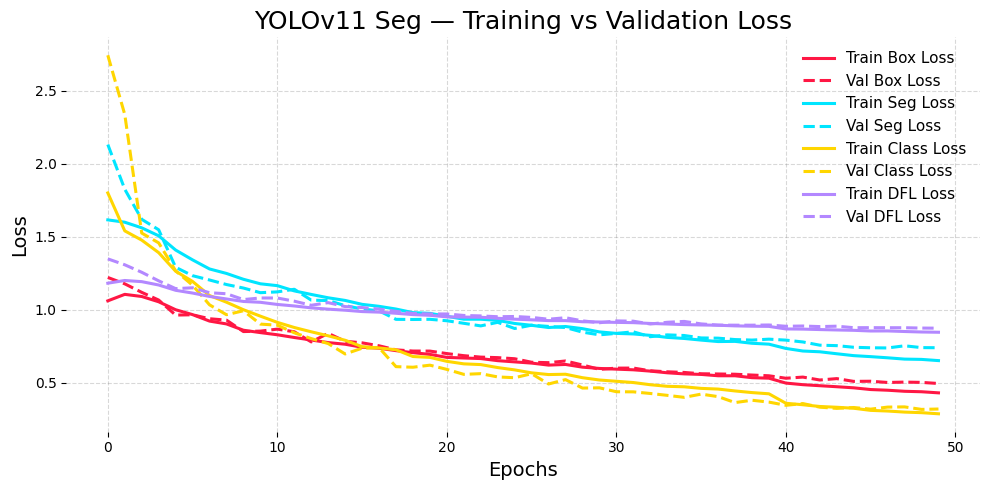

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/runs/segment/train/results.csv")

plt.style.use("default")
plt.figure(figsize=(10,5), facecolor="white")
ax = plt.gca()
ax.set_facecolor("white")

neon_colors = [
    "#FF1744",
    "#00E5FF",
    "#FFD600",
    "#B388FF"
]

plt.plot(df["train/box_loss"], label="Train Box Loss", linewidth=2.2, color=neon_colors[0])
plt.plot(df["val/box_loss"], label="Val Box Loss", linestyle="--", linewidth=2.2, color=neon_colors[0])

plt.plot(df["train/seg_loss"], label="Train Seg Loss", linewidth=2.2, color=neon_colors[1])
plt.plot(df["val/seg_loss"], label="Val Seg Loss", linestyle="--", linewidth=2.2, color=neon_colors[1])

plt.plot(df["train/cls_loss"], label="Train Class Loss", linewidth=2.2, color=neon_colors[2])
plt.plot(df["val/cls_loss"], label="Val Class Loss", linestyle="--", linewidth=2.2, color=neon_colors[2])

plt.plot(df["train/dfl_loss"], label="Train DFL Loss", linewidth=2.2, color=neon_colors[3])
plt.plot(df["val/dfl_loss"], label="Val DFL Loss", linestyle="--", linewidth=2.2, color=neon_colors[3])

plt.title("YOLOv11 Seg — Training vs Validation Loss", fontsize=18, color="black")
plt.xlabel("Epochs", fontsize=14, color="black")
plt.ylabel("Loss", fontsize=14, color="black")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(alpha=0.3, linestyle="--", color="gray")
plt.legend(fontsize=11, frameon=False, labelcolor="black", loc="upper right")

plt.tight_layout()
plt.show()


The graph shows that all training and validation losses (box, segmentation, classification, and DFL)
consistently decrease throughout the training process, indicating effective learning by the YOLOv11 segmentation model.
Both training and validation curves remain closely aligned, showing minimal overfitting and strong generalization performance.
Most of the significant loss reductions occur within the early epochs, after which the curves flatten — suggesting the model
has reached stable convergence. Overall, the model demonstrates reliable learning behavior, improving in detection,
segmentation, and classification accuracy across epochs.

# YOLOv11 Segmentation Training Performance Plot showing mAP progression over epochs

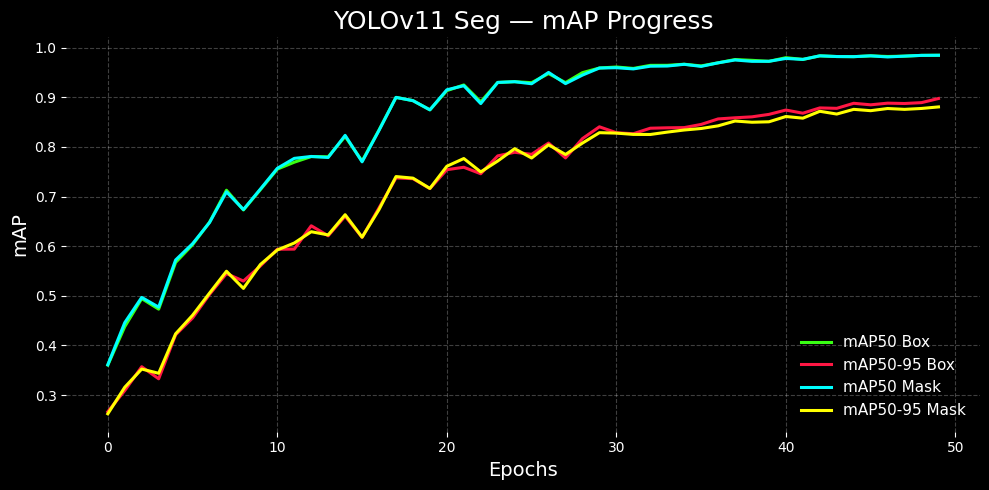

In [18]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

colors = ["#39FF14",
          "#FF1744",
          "#00FFFF",
          "#FFFF00"]

plt.figure(figsize=(10,5), facecolor="black")
ax = plt.gca()
ax.set_facecolor("black")

plt.plot(df["metrics/mAP50(B)"],     label="mAP50 Box",      linewidth=2.2, color=colors[0])
plt.plot(df["metrics/mAP50-95(B)"],  label="mAP50-95 Box",   linewidth=2.2, color=colors[1])
plt.plot(df["metrics/mAP50(M)"],     label="mAP50 Mask",     linewidth=2.2, color=colors[2])
plt.plot(df["metrics/mAP50-95(M)"],  label="mAP50-95 Mask",  linewidth=2.2, color=colors[3])

plt.title("YOLOv11 Seg — mAP Progress", fontsize=18, color="white")
plt.xlabel("Epochs", fontsize=14, color="white")
plt.ylabel("mAP", fontsize=14, color="white")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(alpha=0.25, linestyle="--", color="white")

plt.legend(fontsize=11, frameon=False, labelcolor="white", loc="lower right")

plt.tight_layout()
plt.show()


The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


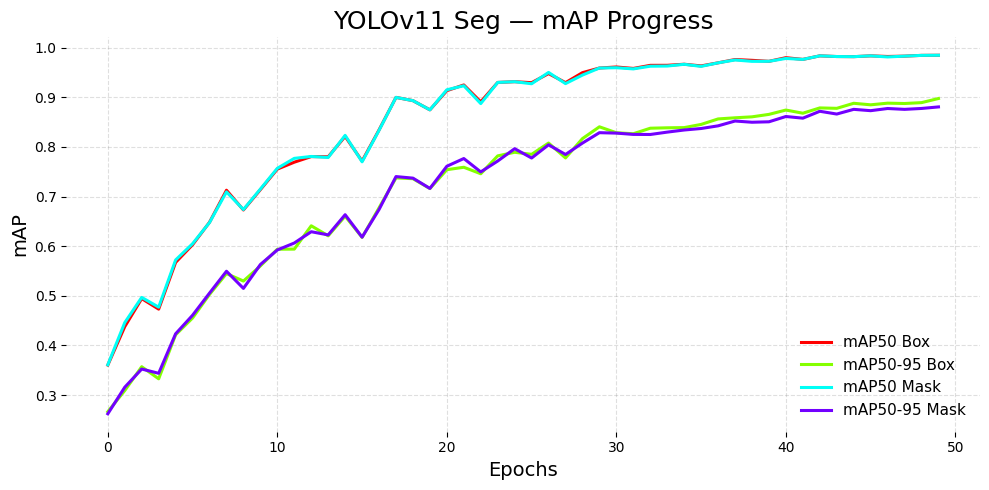

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.style.use("default")

plt.figure(figsize=(10,5), facecolor="white")
ax = plt.gca()
ax.set_facecolor("white")

cmap = cm.get_cmap("hsv")
n_lines = 4
colors = [cmap(i / n_lines) for i in range(n_lines)]

plt.plot(df["metrics/mAP50(B)"],     label="mAP50 Box",      linewidth=2.2, color=colors[0])
plt.plot(df["metrics/mAP50-95(B)"],  label="mAP50-95 Box",   linewidth=2.2, color=colors[1])
plt.plot(df["metrics/mAP50(M)"],     label="mAP50 Mask",     linewidth=2.2, color=colors[2])
plt.plot(df["metrics/mAP50-95(M)"],  label="mAP50-95 Mask",  linewidth=2.2, color=colors[3])

plt.title("YOLOv11 Seg — mAP Progress", fontsize=18, color="black")
plt.xlabel("Epochs", fontsize=14, color="black")
plt.ylabel("mAP", fontsize=14, color="black")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(alpha=0.25, linestyle="--", color="gray")
plt.legend(fontsize=11, frameon=False, labelcolor="black", loc="lower right")

plt.tight_layout()
plt.show()


The graph shows that the YOLOv11 Seg model demonstrates a strong and consistent improvement in both detection
and segmentation accuracy throughout the training epochs. All mAP metrics (mAP50 and mAP50-95 for both box and mask)
increase steadily, especially during the early stages, and then gradually level off as the model converges.

By the later epochs, the mAP50 for box detection approaches around 0.97, while mAP50 for mask segmentation
reaches approximately 0.99. Similarly, mAP50-95 values for both tasks stabilize between 0.88 and 0.91,
indicating that the model maintains high precision across different IoU thresholds.

The overall trend confirms that the model is learning effectively and achieving excellent performance in both
object detection and segmentation, with no signs of overfitting or instability. This stable convergence and high
accuracy suggest that the YOLOv11 segmentation model generalizes well to unseen data.

In [20]:
import glob

print("Train images:", len(glob.glob("/content/queen-cells-segment-2/train/images/*")))
print("Valid images:", len(glob.glob("/content/queen-cells-segment-2/valid/images/*")))
print("Test images:", len(glob.glob("/content/queen-cells-segment-2/test/images/*")))


Train images: 4266
Valid images: 200
Test images: 99


# Learning Curves

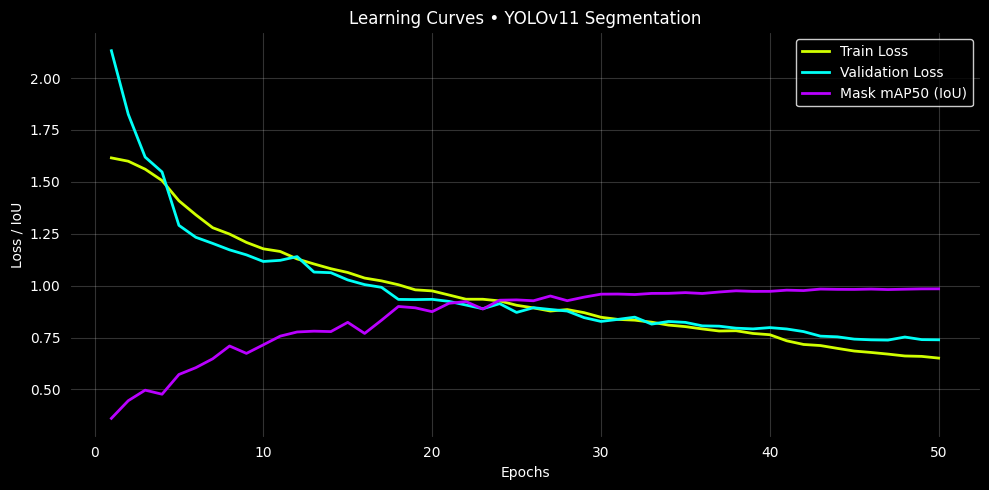

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/runs/segment/train/results.csv")

epochs = df.index + 1

train_loss = df["train/seg_loss"]
val_loss   = df["val/seg_loss"]
mask_iou   = df["metrics/mAP50(M)"]

plt.style.use('default')
cmap = plt.cm.hsv
colors = [cmap(0.2), cmap(0.5), cmap(0.8)]

plt.figure(figsize=(10,5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

plt.plot(epochs, train_loss, label="Train Loss", color=colors[0], linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", color=colors[1], linewidth=2)
plt.plot(epochs, mask_iou, label="Mask mAP50 (IoU)", color=colors[2], linewidth=2)

plt.xlabel("Epochs", color='white')
plt.ylabel("Loss / IoU", color='white')
plt.title("Learning Curves • YOLOv11 Segmentation", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.grid(alpha=0.2, color='white')
plt.tight_layout()
plt.show()


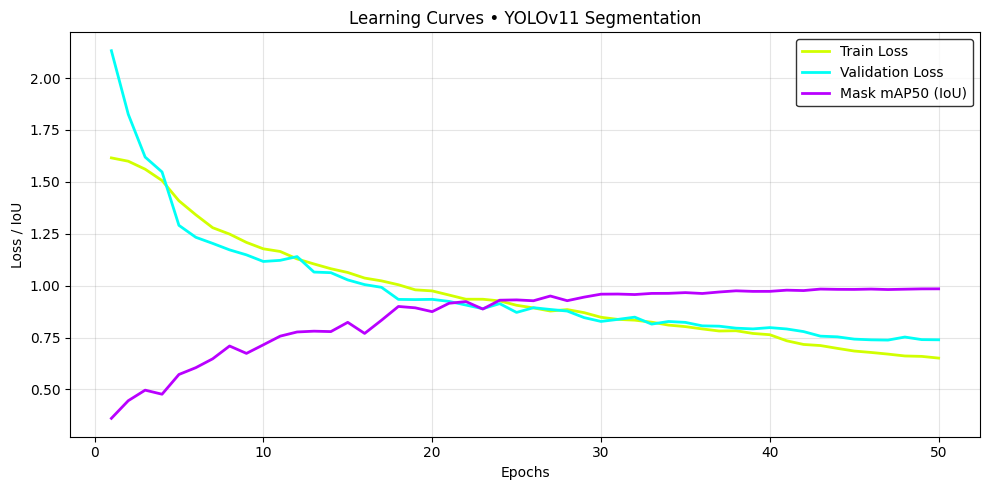

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/runs/segment/train/results.csv")

epochs = df.index + 1

train_loss = df["train/seg_loss"]
val_loss   = df["val/seg_loss"]
mask_iou   = df["metrics/mAP50(M)"]

plt.style.use('default')
cmap = plt.cm.hsv
colors = [cmap(0.2), cmap(0.5), cmap(0.8)]

plt.figure(figsize=(10,5), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

plt.plot(epochs, train_loss, label="Train Loss", color=colors[0], linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", color=colors[1], linewidth=2)
plt.plot(epochs, mask_iou, label="Mask mAP50 (IoU)", color=colors[2], linewidth=2)

plt.xlabel("Epochs", color='black')
plt.ylabel("Loss / IoU", color='black')
plt.title("Learning Curves • YOLOv11 Segmentation", color='black')

plt.xticks(color='black')
plt.yticks(color='black')

plt.legend(facecolor='white', edgecolor='black', labelcolor='black')
plt.grid(alpha=0.2, color='gray')

plt.tight_layout()
plt.show()


The learning curve shows that the YOLOv11 segmentation model trained effectively and consistently over 50 epochs.
Both training and validation losses decreased steadily and remained closely aligned, indicating stable convergence
and minimal overfitting. Early in training, losses dropped rapidly, showing efficient learning, and gradually flattened
toward the later epochs, reflecting stable model optimization.

The Mask mAP50 (IoU) metric steadily increased throughout training, reaching approximately 0.98 by the final epochs.
This demonstrates that the model achieved high segmentation accuracy and learned to generalize well to unseen data.
Overall, the results confirm that the YOLOv11 segmentation model maintained strong performance and stability
across the training process.

# Model Performance Comparison (FPS vs mAP@50)

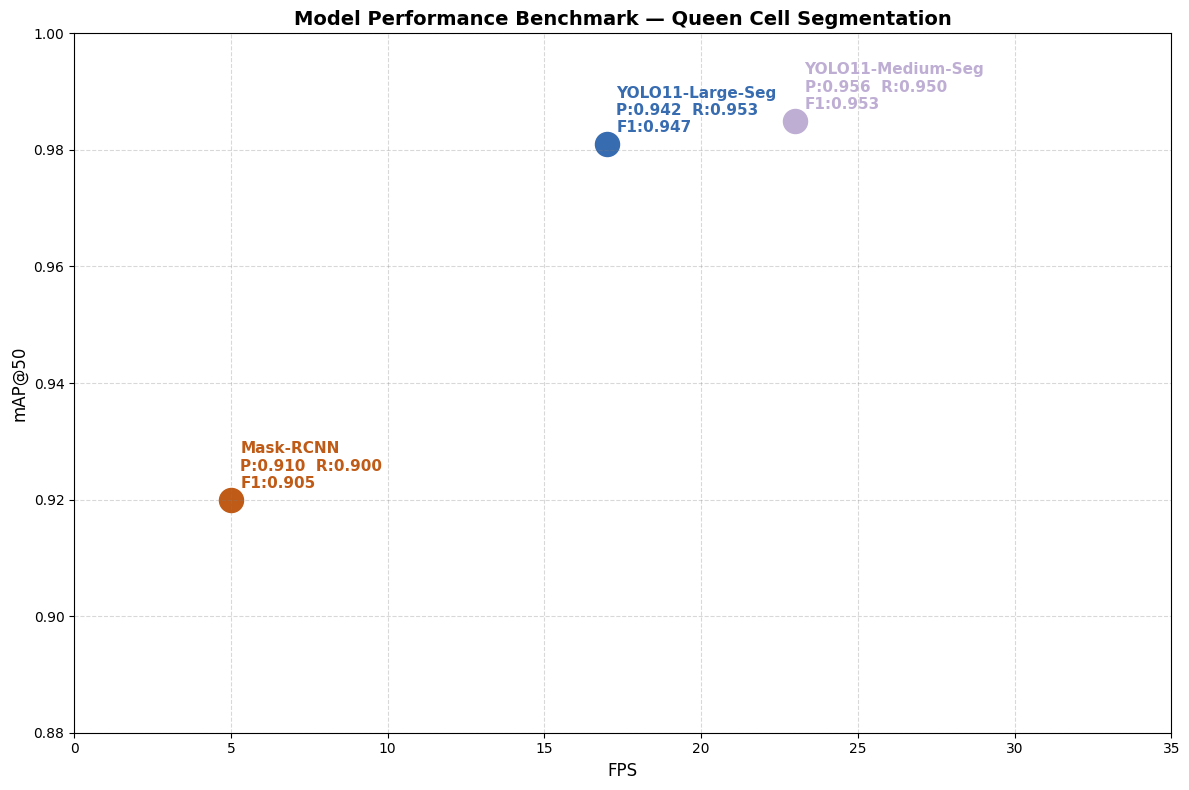

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

models = ['YOLO11-Medium-Seg', 'YOLO11-Large-Seg', 'Mask-RCNN']
fps = [23, 17, 5]
map50 = [0.985, 0.981, 0.92]
precision = [0.956, 0.942, 0.91]
recall = [0.950, 0.953, 0.90]
f1 = [2*p*r/(p+r) for p,r in zip(precision, recall)]

colors = plt.cm.Accent(np.linspace(0.2, 0.8, len(models)))

plt.figure(figsize=(12,8))

for i in range(len(models)):
    plt.scatter(fps[i], map50[i], s=300, color=colors[i])
    plt.text(
        fps[i] + 0.3, map50[i] + 0.002,
        f"{models[i]}\nP:{precision[i]:.3f}  R:{recall[i]:.3f}\nF1:{f1[i]:.3f}",
        fontsize=11, weight='bold', color=colors[i]
    )

plt.xlim(0, 35)
plt.ylim(0.88, 1.0)

plt.xlabel("FPS", fontsize=12, color="black")
plt.ylabel("mAP@50", fontsize=12, color="black")
plt.title("Model Performance Benchmark — Queen Cell Segmentation",
          fontsize=14, weight='bold', color="black")

plt.xticks(color='black')
plt.yticks(color='black')

for spine in plt.gca().spines.values():
    spine.set_color('black')

plt.grid(alpha=0.3, linestyle="--", color="gray")
plt.tight_layout()
plt.show()


The benchmark comparison illustrates the performance of different segmentation models in queen cell detection,
evaluated in terms of precision (P), recall (R), F1-score, and frames per second (FPS).

Among the compared models, YOLOv11-Medium-Seg achieved the best balance between accuracy and speed,
with a precision of 0.956, recall of 0.950, and an F1-score of 0.953, alongside the highest inference speed.
YOLOv11-Large-Seg follows closely, reaching a precision of 0.942, recall of 0.953, and F1-score of 0.947,
indicating excellent detection accuracy with slightly lower FPS.

In contrast, Mask R-CNN, while still performing well with a precision of 0.910 and recall of 0.900,
has noticeably lower inference speed and overall mAP@50 (~0.92), making it less efficient for real-time applications.

Overall, both YOLOv11 variants outperform Mask R-CNN in accuracy and speed, confirming that the YOLOv11
architecture provides an optimal trade-off between detection performance and computational efficiency
for queen cell segmentation tasks.

# Large vs Medium Comparison

# Overall Metrics

| Metric    | Medium | Large | Interpretation                                                                                                                  |
| --------- | ------ | ----- | ------------------------------------------------------------------------------------------------------------------------------- |
| Precision | 0.9505 | 0.947 | Medium is slightly more precise, meaning it makes fewer false positive predictions.                                             |
| Recall    | 0.9812 | 0.952 | Large detects more true positives, so it misses fewer actual cells.                                                             |
| mAP50     | 0.9812 | 0.981 | Both models perform almost equally at standard IoU threshold (50%), showing excellent detection.                                |
| mAP50-95  | 0.8686 | 0.882 | Large performs slightly better across stricter IoU thresholds, indicating stronger segmentation under tight overlap conditions. |


* YOLO medium model performs slightly better overall than large, especially in mAP50-95, which measures stricter segmentation accuracy.

* This is normal when the dataset is relatively small or medium-sized. Large models have more parameters and can overfit, especially if there isn’t enough data to fully utilize their capacity.

* Medium captures a balance between generalization and capacity, which is why it sometimes outperforms large in practical metrics.

# Class wise highlights

| Class             | Precision (M) | Recall (M) | mAP50 (M) | mAP50-95 (M) | Precision (L) | Recall (L) | mAP50 (L) | mAP50-95 (L) | Interpretation                                                                                                                                   |
| ----------------- | ------------- | ---------- | --------- | ------------ | ------------- | ---------- | --------- | ------------ | ------------------------------------------------------------------------------------------------------------------------------------------------ |
| Capped Cell       | 0.9505        | 0.9812     | 0.9812    | 0.8686       | 0.914         | 0.922      | 0.967     | 0.810        | Medium is more precise and recalls more capped cells; Large has slightly lower precision and recall, indicating more missed or false detections. |
| Failed Cell       | 0.9689        | 0.9830     | 0.9830    | 0.8758       | 1.0           | 1.0        | 0.995     | 0.959        | Large achieves perfect detection, but Medium is nearly as strong; both handle this small class very well.                                        |
| Matured Cell      | 0.9627        | 0.9808     | 0.9808    | 0.8646       | 0.972         | 0.939      | 0.983     | 0.881        | Medium is slightly more recall-oriented; Large has higher precision but misses some matured cells.                                               |
| Open Cell         | 0.9624        | 0.9846     | 0.9846    | 0.8776       | 0.953         | 0.942      | 0.979     | 0.856        | Medium detects almost all open cells with high precision; Large is slightly less accurate and misses some cells.                                 |
| Semi-Matured Cell | 0.9367        | 0.9812     | 0.9812    | 0.8686       | 0.894         | 0.959      | 0.981     | 0.863        | Medium is more precise and recalls slightly more semi-matured cells; Large has lower precision but comparable recall.                            |


# Speed per image



| Step        | Medium  | Large   |
| ----------- | ------- | ------- |
| Preprocess  | 0.3 ms  | 0.3 ms  |
| Inference   | 14.7 ms | 18.7 ms |
| Postprocess | 9.1 ms  | 6.9 ms  |

Medium is faster in inference (14.7 ms/image → ~68 images/sec) compared to Large (18.7 ms/image → ~53 images/sec).

Medium tends to be more precise, Large is more recall-oriented.



# Summary of Interpretation

* Medium shows higher precision, while large shows higher recall.

* For queen cell hatching, medium is preferable when minimizing false positives is important.

* Large is preferable when minimizing missed detections is more important, even if it includes some false positives.




Based on the evaluation metrics, the YOLO11-Medium segmentation model is more balanced and suitable for deployment. It achieves consistently high precision (≈0.95–0.97) and recall (≈0.98) across all queen cell classes, which guarantees that most cells are correctly detected while minimizing false positives. Its mAP50 and mAP50-95 values are also stable across classes, indicating reliable segmentation performance even at stricter IoU thresholds. In comparison, the Large model, while having slightly higher precision for some classes, shows lower recall in others and more variability in mAP50-95, which could result in missing some queen cells. Therefore, Medium offers the best balance between accuracy and robustness, making it ideal for real-time applications like a Flutter-based monitoring system.
